In [1]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


Asama 1 
kutuphaneleri import etme

In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Asama 2 veri seti yukleme ve veri seti uzerinde bilgi alma

In [72]:
file_name = '/content/driver/MyDrive/For Keras/cancer patient data sets.xlsx' 
df = pd.read_excel(file_name)
df.head()

Age  Gender  Air Pollution  ...  Dry Cough  Snoring   Level
0   33       1              2  ...          3        4     Low
1   17       1              3  ...          7        2  Medium
2   35       1              4  ...          7        2    High
3   37       1              7  ...          7        5    High
4   46       1              6  ...          2        3    High

[5 rows x 24 columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

Low = 0, Medium 1, High=2

In [74]:
k=0;
while k<len(df):
  if df.iloc[k,23]=='Low':
    df.iloc[k,23]=0;
  elif df.iloc[k,23]=='Medium':
    df.iloc[k,23]=1;
  else:
    df.iloc[k,23]=2

    
  k+=1; 

Veriseti iceresindeki tum objeleri int donusme

In [75]:
donusum = {"Level":int} 
df=df.astype(donusum)
print(df.dtypes)

Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object


In [76]:
df.Level.value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

In [103]:
#Tekrarliyan veri kontrol edilmesi ancak yuksek accuracy degerleri aldikten sonra aklima geldi
#Malesef en basta tekrar veri varmi bakmamistim 
df = df.drop_duplicates()

In [104]:
df.describe()

Age      Gender  ...     Snoring       Level
count  152.000000  152.000000  ...  152.000000  152.000000
mean    38.236842    1.414474  ...    2.921053    1.039474
std     11.798382    0.494259  ...    1.542022    0.812824
min     14.000000    1.000000  ...    1.000000    0.000000
25%     28.000000    1.000000  ...    2.000000    0.000000
50%     37.000000    1.000000  ...    3.000000    1.000000
75%     46.000000    2.000000  ...    4.000000    2.000000
max     73.000000    2.000000  ...    7.000000    2.000000

[8 rows x 24 columns]

Asama 3 Veri seti x ve y'yi ayrima ve normalizasiyon islemi

In [105]:
x = df.drop('Level',axis=1)
y = df.Level.values;
x = ((x-np.min(x))/(np.max(x)-np.min(x))).values


Asama 4 Test Train

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [116]:
print('x ',x_train.shape)
print('y',y_train.shape)

x  (30, 23)
y (30,)


Asama 5 MLPClassifier NN uygulamasi

In [61]:
mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(23,3),(5,3),(100,100)],
            "solver":["adam","sgd"]}

mlpc=MLPClassifier(activation='logistic',max_iter=400,random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=3,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   33.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [108]:
print(mlpc_cv_model.best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


Modelin calistirilmasi

In [109]:
mlpc=MLPClassifier(activation='relu',random_state=1,max_iter=400,alpha= 0.1,hidden_layer_sizes=(100,100), solver='adam')
mlpc.fit(x_train,y_train)
print(mlpc.score(x_test,y_test))

0.9354838709677419


Asam 6 Degerlendirme

In [110]:
y_pred = mlpc.predict(x_test)


In [111]:
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9354838709677419


In [112]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[12  0  0]
 [ 1  8  1]
 [ 0  0  9]]


In [113]:
f1=metrics.f1_score(y_test,y_pred,average='micro')
print("f1 micro:",f1)
f2=metrics.f1_score(y_test,y_pred,average='macro')
print("f1 macro:",f2)
f3=metrics.f1_score(y_test,y_pred,average='weighted')
print("f1 score:",f3)

f1 micro: 0.9354838709677419
f1 macro: 0.9320857699805069
f1 score: 0.9333936993020185


MPLC seaborn confiusion matrix

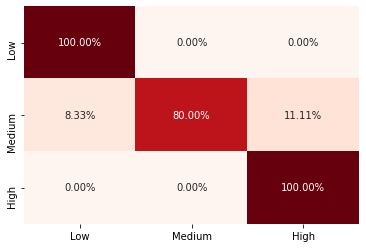

In [114]:
class_adlari=["Low","Medium","High"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Reds",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

Asama 7 Keras Uygulamasi

In [88]:
model1=Sequential()

model1.add(Dense(23,input_dim=23,activation="relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation="relu"))
model1.add(BatchNormalization())


model1.add(Dense(128,activation="relu"))
model1.add(BatchNormalization())

model1.add(Dense(3,activation="softmax"))


model1.compile( optimizer='adam',loss="sparse_categorical_crossentropy",       
              metrics=['accuracy'])

In [47]:
egitim=model1.fit(x_train,y_train,epochs=200)
scores = model1.evaluate(x_test, y_test)
print("For model 1")
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))


Epoch 1/200
19/19 [==============================] - 1s 3ms/step - loss: 0.5513 - accuracy: 0.7914
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9545
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9946
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9925
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 8/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 9/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9974
Epoch 10/200
19/19 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9870
Epoch 11/

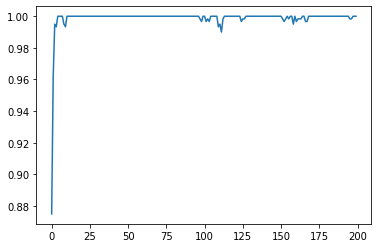

In [48]:
plt.plot(egitim.history["accuracy"])
plt.show()

In [59]:
kfold = StratifiedKFold(n_splits=3,shuffle=True, random_state=1)
model = Sequential()
cvscores = []

for train, test in kfold.split(x, y):

  model=Sequential()

  model.add(Dense(23,input_dim=23,activation="relu"))
  model.add(BatchNormalization())

  model.add(Dense(128,activation="relu"))
  model.add(BatchNormalization())


  model.add(Dense(128,activation="relu"))
  model.add(BatchNormalization())

  model.add(Dense(3,activation="softmax"))


  model.compile( optimizer='adam',loss="sparse_categorical_crossentropy",       
              metrics=['accuracy'])
  
  egitim=model.fit(x_train,y_train,epochs=200)
  scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/200
19/19 [==============================] - 1s 2ms/step - loss: 0.8529 - accuracy: 0.6429
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9747
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9912
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9919
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9987
Epoch 6/200
19/19 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9993
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9976
Epoch 8/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 9/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9998
Epoch 10/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9997
Epoch 11/

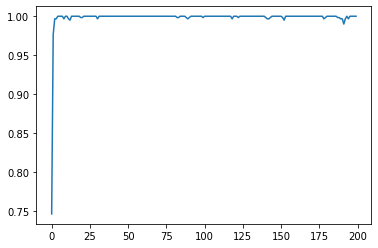

In [60]:
plt.plot(egitim.history["accuracy"])
plt.show()

Age  Gender  Air Pollution  ...  Dry Cough  Snoring  Level
0     33       1              2  ...          3        4      0
1     17       1              3  ...          7        2      1
2     35       1              4  ...          7        2      2
3     37       1              7  ...          7        5      2
4     46       1              6  ...          2        3      2
..   ...     ...            ...  ...        ...      ...    ...
497   35       1              2  ...          2        2      0
977   45       1              3  ...          4        3      0
979   53       1              3  ...          6        2      0
983   26       1              3  ...          5        4      1
984   37       1              1  ...          2        5      1

[152 rows x 24 columns]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  